In [2]:
import pandas as pd

In [8]:
base_dir = './clean-data'

pops = pd.read_csv(f'{base_dir}/populations.csv')
bios = pd.read_csv(f'{base_dir}/bios.csv')
results = pd.read_csv(f'{base_dir}/results.csv')


### Which countries have the most medals?

In [23]:
results[results['as'].str.contains('Michael Phelps')].value_counts('medal')

medal
Gold      23
Silver     3
Bronze     2
Name: count, dtype: int64

In [24]:
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN


In [76]:
country_code = 'USA'

medals = results[(results['medal'].notna()) & (results['type']=='Summer') & (~results['event'].str.endswith('(YOG)'))].drop_duplicates(['year', 'type', 'discipline','noc', 'event', 'medal'])
medals.groupby(['noc', 'year']).count().loc[country_code]


,type,discipline,event,as,athlete_id,team,place,tied,medal
year,,,,,,,,,
1896.0,19,19,19,19,19,0,19,19,19
1900.0,51,51,51,51,51,4,51,51,51
1904.0,250,250,250,250,250,45,250,250,250
1908.0,46,46,46,46,46,5,46,46,46
1912.0,64,64,64,64,64,12,64,64,64
1920.0,96,96,96,96,96,22,96,96,96
1924.0,100,100,100,100,100,22,100,100,100
1928.0,56,56,56,56,56,9,56,56,56
1932.0,104,104,104,104,104,22,104,104,104


In [86]:
print(medals[(medals['noc']==country_code) & (medals['year']==1904)].to_string())

          year    type                        discipline                                                 event                      as  athlete_id  noc                                     team  place   tied   medal
4396    1904.0  Summer                           Archery                Double Columbia Round, Women (Olympic)              Emma Cooke        2206  USA                                      NaN    2.0  False  Silver
4397    1904.0  Summer                           Archery                Double National Round, Women (Olympic)              Emma Cooke        2206  USA                                      NaN    2.0  False  Silver
4405    1904.0  Summer                           Archery                Double Columbia Round, Women (Olympic)             Lida Howell        2209  USA                                      NaN    1.0  False    Gold
4406    1904.0  Summer                           Archery                Double National Round, Women (Olympic)             Lida Howell      

In [83]:
print(medals.groupby(['noc', 'year']).value_counts(['place']).loc[country_code])

year    place
1896.0  1.0      11
        2.0       6
        3.0       2
1900.0  1.0      20
        3.0      17
                 ..
2016.0  3.0      38
        2.0      37
2020.0  2.0      41
        1.0      37
        3.0      31
Name: count, Length: 85, dtype: int64


In [26]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [3]:
df = pd.read_csv('./checkpoints/bios_71000.csv')

In [4]:
df.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,lat,long
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,44.841225,-0.580036
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,49.004971,1.910084
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,43.471144,-1.552727
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,48.877480,2.317650
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,51.457027,-0.193261


In [6]:
import folium

In [12]:
import folium
from folium.plugins import HeatMap

# Create a map centered at the mean latitude and longitude
df = df[df['lat'].notna() & df['long'].notna()]
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=2)

# Create a HeatMap layer using the lat/long coordinates from the dataframe
heat_data = [[row['lat'], row['long']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m

## Number of medals over time by country

In [13]:
results = pd.read_csv('./clean-data/results.csv')

In [25]:
country_code = 'USA'

medals = results[(results['medal'].notna()) & (results['type']=='Summer') & (~results['event'].str.endswith('(YOG)'))].drop_duplicates(['year', 'type', 'discipline','noc', 'event', 'medal'])
medals.groupby(['noc', 'year']).count().loc[country_code]

,type,discipline,event,as,athlete_id,team,place,tied,medal
year,,,,,,,,,
1896.0,19,19,19,19,19,0,19,19,19
1900.0,51,51,51,51,51,4,51,51,51
1904.0,250,250,250,250,250,45,250,250,250
1908.0,46,46,46,46,46,5,46,46,46
1912.0,64,64,64,64,64,12,64,64,64
1920.0,96,96,96,96,96,22,96,96,96
1924.0,100,100,100,100,100,22,100,100,100
1928.0,56,56,56,56,56,9,56,56,56
1932.0,104,104,104,104,104,22,104,104,104


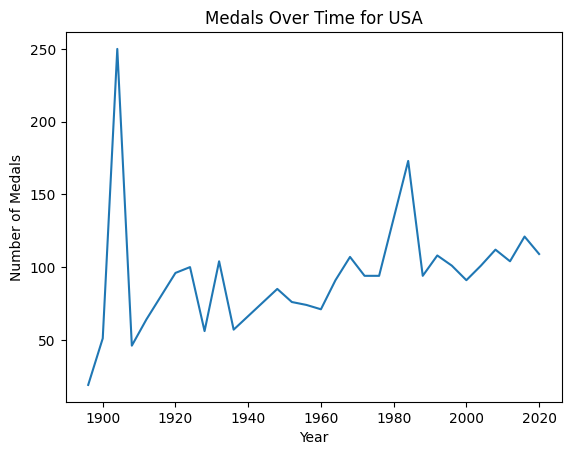

In [27]:
import matplotlib.pyplot as plt

# fill year values from 1896 to 2022 moving every 4 years with 0s if the year does already exist

# Filter the medals dataframe for the specified country_code
medals_country = medals[medals['noc'] == country_code]

# Group the medals by year and count the number of medals
medals_over_time = medals_country.groupby('year')['medal'].count()

# Plot the medals over time as a line chart
medals_over_time.plot(kind='line')

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Number of Medals')

# Set the title of the plot
plt.title('Medals Over Time for {}'.format(country_code))

# Display the plot
plt.show()